In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
dataset= pd.read_csv('Happy_2019.csv')
dataset.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
len(dataset.columns)

9

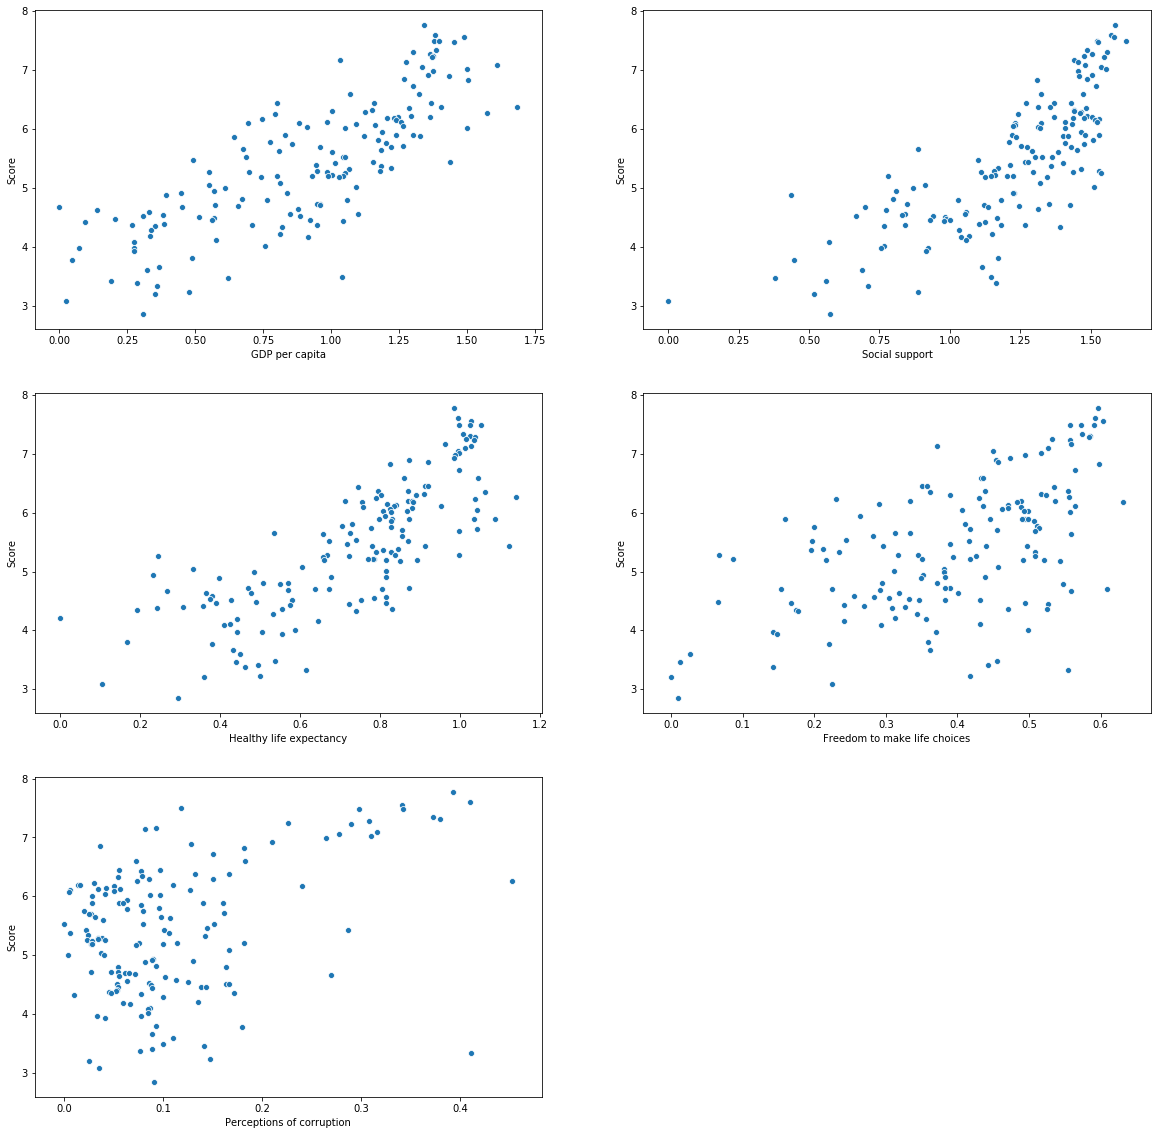

In [17]:
j=1
cols=['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption']
plt.figure(figsize=(20,20))
for i in cols:
    plt.subplot(3,2,j)
    j+=1
    sns.scatterplot(data=dataset,y="Score",x=str(i))
    

# Determining X and y

In [18]:
X=dataset[cols]
y=dataset[['Score']]
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [19]:
mmscaler=MinMaxScaler(feature_range=(0,1))
X_norm=mmscaler.fit_transform(X)
y_norm=mmscaler.fit_transform(y)

In [20]:
X_train,X_test,y_train,y_test=TTS(X_norm,y_norm,train_size=0.8,random_state=45)

In [21]:
y_train

array([[0.56956876],
       [0.41903987],
       [0.26708706],
       [0.31265256],
       [0.73047193],
       [0.32811229],
       [0.86187958],
       [0.72884459],
       [0.10720098],
       [0.70545159],
       [0.69344996],
       [0.12917006],
       [0.66415785],
       [0.96562246],
       [0.39849471],
       [0.35272579],
       [0.78783564],
       [0.59092758],
       [0.54312449],
       [0.19304312],
       [0.68043124],
       [0.66049634],
       [0.64178194],
       [0.37489829],
       [0.62794955],
       [0.50244101],
       [0.30085435],
       [0.6495118 ],
       [0.30939788],
       [0.81346623],
       [0.71216436],
       [0.41761595],
       [0.65439382],
       [0.37713588],
       [0.95626526],
       [0.67717657],
       [0.67046379],
       [0.76057771],
       [0.09784378],
       [0.52461351],
       [0.90602116],
       [0.64442636],
       [0.48982913],
       [0.4906428 ],
       [0.53173312],
       [0.49471115],
       [0.89361269],
       [0.807

In [22]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

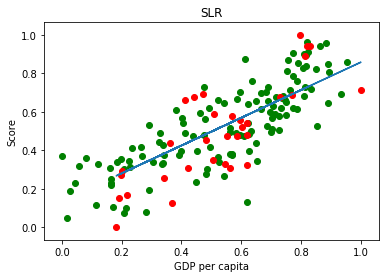

  SLOPE OF LINE  =  [[0.72196242]]
  INTERCEPT OF THE LINE  =  [0.13607811]


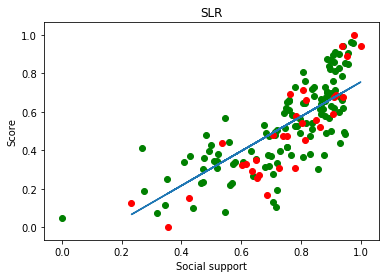

  SLOPE OF LINE  =  [[0.89809042]]
  INTERCEPT OF THE LINE  =  [-0.14298221]


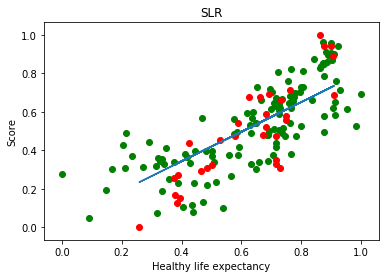

  SLOPE OF LINE  =  [[0.76945364]]
  INTERCEPT OF THE LINE  =  [0.03505151]


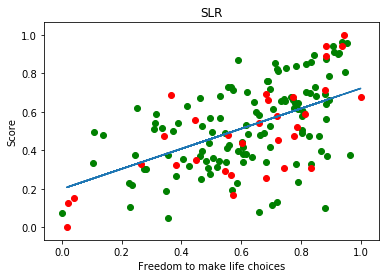

  SLOPE OF LINE  =  [[0.52311773]]
  INTERCEPT OF THE LINE  =  [0.19883712]


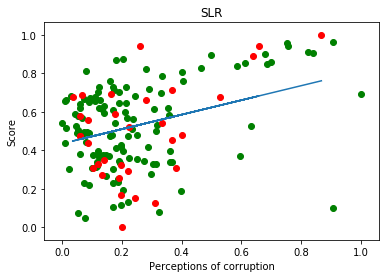

  SLOPE OF LINE  =  [[0.37685807]]
  INTERCEPT OF THE LINE  =  [0.43472153]


In [35]:
store={}
for i in range(0,5,1):
    plt.xlabel(str(cols[i]))
    plt.ylabel("Score")
    plt.scatter(X_train.iloc[:,i:i+1],y_train,c='green')
    lr=LinearRegression()
    lr=lr.fit(X_train.iloc[:,i:i+1],y_train)
    MSE=mean_squared_error(y_test,lr.predict(X_test.iloc[:,i:i+1]))
    R_SCORE=r2_score(y_test,lr.predict(X_test.iloc[:,i:i+1]))
    store[str(cols[i])]=list([lr.coef_[0][0],lr.intercept_[0],MSE,R_SCORE])
    plt.plot(X_test.iloc[:,i:i+1],lr.predict(X_test.iloc[:,i:i+1]))
    plt.scatter(X_test.iloc[:,i:i+1],y_test,c="red")
    plt.title("SLR")
    plt.show()
    print("  SLOPE OF LINE  = ",lr.coef_)
    print("  INTERCEPT OF THE LINE  = ",lr.intercept_)

In [36]:
type(lr)

sklearn.linear_model.base.LinearRegression

In [45]:
mse=[]
r=[]
min_attri=""
for key,value in store.items():
    mse.append(value[-2])
for i in mse:
    if(i==min(mse)):
        min_attri=str(cols[mse.index(i)])
        print(min_error_feature)


NameError: name 'min_error_feature' is not defined

In [46]:
# To predict
def happy_predict():
    print("\n Enter the amount of ",min_attri," in your country : ")
    ss=float(input())
    return store[min_attri][0]*ss+store[min_attri][1]
happy_predict()


 Enter the amount of  Social support  in your country : 
2.5


2.102243840589943

In [ ]:
#link to the dataset : https://www.kaggle.com/unsdsn/world-happiness